# Exploratory Data Analysis: Alcohol Consumption Across the World

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Below, I imported two csv files to merge into one new dataframe:
1. ```alcoholdata``` dataframe containing **alcohol consumption across the world**
2. ```countrycontinentmatch``` dataframe **maps the country name to the continent**. 

### Data Overview
I wanted to see what types of data each dataframe comprises of using:
- ```df.head()``` to view the first 5 rows of the dataframe
-```df.dtypes``` to view the types of data in each column

In [2]:
alcoholdata=pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv')
alcoholdata.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [3]:
alcoholdata.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

In [4]:
countrycontinentmatch=pd.read_csv('https://pkgstore.datahub.io/JohnSnowLabs/country-and-continent-codes-list/country-and-continent-codes-list-csv_csv/data/b7876b7f496677669644f3d1069d3121/country-and-continent-codes-list-csv_csv.csv')
countrycontinentmatch.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


### Data Manipulation: Extracting the country name

I only need the first word of the **Country_Name** column, thus I will use the split() method to return a list of all the words in the string, and extract the first word, followed by replacing the commas with a whitespace.
- ```str.split()```: This returns a list of lines
- ```str.split().str[x]```: This returns a xth value in the string
- ```str.replace(['old value'],'new value')```: This replaces values in a dataframe

In [5]:
countrycontinentmatch.dtypes

Continent_Name                object
Continent_Code                object
Country_Name                  object
Two_Letter_Country_Code       object
Three_Letter_Country_Code     object
Country_Number               float64
dtype: object

In [6]:
#splitting the 'Country_Name' column into lines of lists and extracting the first word with str[0]
countrycontinentmatch['Name']=countrycontinentmatch['Country_Name'].str.split(' ').str[0]
countrycontinentmatch['Name']

0      Afghanistan,
1          Albania,
2        Antarctica
3          Algeria,
4          American
           ...     
257         Zambia,
258        Disputed
259      Iraq-Saudi
260          United
261         Spratly
Name: Name, Length: 262, dtype: object

In [7]:
#removing the commas from the name column
countrycontinentmatch['Name']=countrycontinentmatch['Name'].str.replace(',','')
countrycontinentmatch['Name']

0      Afghanistan
1          Albania
2       Antarctica
3          Algeria
4         American
          ...     
257         Zambia
258       Disputed
259     Iraq-Saudi
260         United
261        Spratly
Name: Name, Length: 262, dtype: object

In [8]:
countrycontinentmatch.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number,Name
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0,Afghanistan
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0,Albania
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0,Antarctica
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0,Algeria
4,Oceania,OC,American Samoa,AS,ASM,16.0,American


### Data Merging: Merging Two Datasets with a Common Column Name

Here, I want to classify the countries in the **alcoholdata** dataframe to match the continents in the **countrycontinentmatch** dataframe. 

I am only interested in the continent name and country for the **countrycontinentmatch** dataframe, let's extract that into its own dataframe **countires**. In this new dataframe, it only consists of 2 columns: Continent, country. Note that I renamed the name to country to match the column name in the alcoholdata dataframe, so that I can leverage the merge function to automatically join using *country* as a common key.
- ```pd.merge()```: Automatically joins dataframes using a common key. If not we can use *left_on* or *right_on* keywords to specify the different column names. 

The output of this is a new dataframe **newalcoholdata** with an additional column for *Continent*

In [9]:
countries=countrycontinentmatch[['Continent_Name','Name']]
countries.rename(columns={'Continent_Name':'Continent','Name':'country'},inplace=True)
countries

/opt/conda/envs/ADA522/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Continent,country
0,Asia,Afghanistan
1,Europe,Albania
2,Antarctica,Antarctica
3,Africa,Algeria
4,Oceania,American
...,...,...
257,Africa,Zambia
258,Oceania,Disputed
259,Asia,Iraq-Saudi
260,Asia,United


In [10]:
newalcoholdata=pd.merge(countries, alcoholdata)
newalcoholdata

,Continent,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Asia,Afghanistan,0,0,0,0.0
1,Europe,Albania,89,132,54,4.9
2,Africa,Algeria,25,0,14,0.7
3,Europe,Andorra,245,138,312,12.4
4,Africa,Angola,217,57,45,5.9
...,...,...,...,...,...,...
159,Asia,Uzbekistan,25,101,8,2.4
160,South America,Venezuela,333,100,3,7.7
161,Oceania,Samoa,105,18,24,2.6
162,Asia,Yemen,6,0,0,0.1


### Data Cleaning: Removing duplicate countries from the dataframe

Given that we combined 2 different datasets, I want to make sure that there are no null values in the columns. I would do this using:
- ```df.isna().sum()```: Displays number of null values in each of the columns of the dataframe

What I can gather from this dataset is:
- There are no null values so I will not need to remove any column / rows with null values. 
- There are 164 rows and 6 columns in this dataset
- Within the continent column, there are 6 unique variable which are Asian, Europe, Africa, South America, Oceania, and North America. This poses a potential opportunity to use groupby to summarize our findings.
- Within the country column, there are 156 unique values which means that there are 8 countries in the column that have duplicated values.
- ```df.duplicated(subset=['col'])```: Displays boolean (T/F) values of duplicate rows. Keep determines which duplicates to keep (first = first occurence is False default, last = last occufrence is False)
- ```df[df.duplicated(subset=['col'])]```: Displays dataframe of duplicate values
- ```df.drop_duplicates()```: If we want to keep the first occurences, put keep = first, else = last, False= drop all duplicates

In [11]:
newalcoholdata.shape

(164, 6)

In [12]:
newalcoholdata.isna().sum()

Continent                       0
country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [13]:
newalcoholdata['Continent'].nunique()

6

In [14]:
newalcoholdata['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'South America', 'Oceania',
       'North America'], dtype=object)

In [15]:
newalcoholdata['country'].nunique()

156

We see below that several Middle Eastern countries such as Azerbaijan, Armenia, Cyprus, Georgia, Kazakhstan, and Turkey show both Asia and Europe as the continent. This is because they span between Asian and Europe; they could be interpreted differently by people.

In order to keep the consistency, I will drop the second duplicate for all these values. I went with this decision based on the categorization of Netherlands since it is in Europe and not in North America. Now, we see that the new dataframe **newalcoholdata** has 156 rows and 6 columns, which is what we want. It has the same number of unique values in the 'country' column. 

In [16]:
newalcoholdata[newalcoholdata.duplicated(subset=['country'], keep=False)]

,Continent,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
5,Europe,Azerbaijan,21,46,5,1.3
6,Asia,Azerbaijan,21,46,5,1.3
13,Europe,Armenia,21,179,11,3.8
14,Asia,Armenia,21,179,11,3.8
35,Africa,Congo,76,1,9,1.7
36,Africa,Congo,76,1,9,1.7
39,Europe,Cyprus,192,154,113,8.2
40,Asia,Cyprus,192,154,113,8.2
53,Europe,Georgia,52,100,149,5.4
54,Asia,Georgia,52,100,149,5.4


In [17]:
newalcoholdata.drop_duplicates(subset=['country'], keep='first', inplace=True)
newalcoholdata.shape

(156, 6)

### Data Grouping and Categorization: Retrieving summary statistics of the continents

Next, I wanted to analyze the difference in beer, spirit, and wine servings across the different continents and / or countries. I used the groupby function to segregate the data by continent and country.
- ```df.groupby(['col to group by'])[col to display].aggregate()```: This function allows us to split data into separate groups to better perform analysis

However, I noticed that the continent column, which had  6 unique variables (Asian, Europe, Africa, South America, Oceania, and North America) poses a potential opportunity to use pivot to summarize our findings.
- ```pd.pivot_table(df, index='col',values='col',aggfunc='x')```: This function allows us to summarize data of a larger table

In [18]:
newalcoholdata.groupby(['Continent','country']).sum()

beer_servings  spirit_servings  wine_servings  \
Continent     country                                                    
Africa        Algeria               25                0             14   
              Angola               217               57             45   
              Benin                 34                4             13   
              Botswana             173               35             35   
              Burundi               88                0              0   
...                                ...              ...            ...   
South America Paraguay             213              117             74   
              Peru                 163              160             21   
              Suriname             128              178              7   
              Uruguay              115               35            220   
              Venezuela            333              100              3   

                         total_litres_of_pure_alcohol  
Continent     country                                  
Africa        Algeria                             0.7  
              Angola                              5.9  
              Benin                               1.1  
              Botswana                            5.4  
              Burundi                             6.3  
...                                               ...  
South America Paraguay                            7.3  
              Peru                                6.1  
              Suriname                            5.6  
              Uruguay                             6.6  
              Venezuela                           7.7  

[156 rows x 4 columns]

Findings #1:
- As shown in the **grouped bar chart**, out of the 6 continents, Europe has the highest number of alcohol servings across all types (beer, spirit, wine). Since there is one column that uses litres as a measurement unit, while the other 3 columns use number of servings, I will exclude the liters column for this visualization. 
- As shown in the **pie chart**, I wanted to ensure that this finding is not skewed by larger number of countries within Europe, so I decided to calculate the number of countries categorized within each continent using ```df.groupby``` to see if that affects the alcohol servings across continents. It turns out that Europe and Africa continets have the largest number of countries, followed by Asia, North America, South America, and Oceania. This shows that there is no strong correlation between alcohol servings and number of countries within each continent. Although the number of countries in Europe and Africa continents are the same, Europe has a significantly higher alcohol servings than Asia.

In [19]:
df_pivot=pd.pivot_table(newalcoholdata, index='Continent',values=['beer_servings','spirit_servings','wine_servings'], aggfunc='sum')
df_pivot

,beer_servings,spirit_servings,wine_servings
Continent,,,
Africa,2605,680,374
Asia,938,1691,148
Europe,8239,5764,6082
North America,1918,2326,292
Oceania,1132,552,319
South America,2101,1377,749


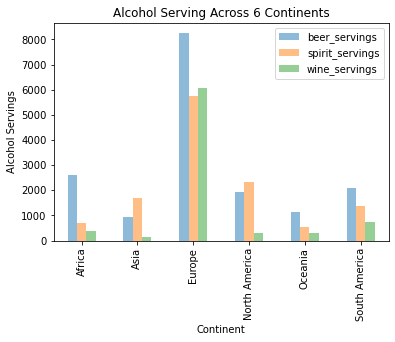

In [20]:
#Creatng a grouped bar chart using matplotlib
ax=df_pivot.plot(kind="bar",alpha=0.5)
plt.title('Alcohol Serving Across 6 Continents')
plt.xlabel('Continent')
plt.ylabel('Alcohol Servings')

#Show plot
plt.show()

In [21]:
groupedcontinent=newalcoholdata.groupby('Continent')['country'].count()
groupedcontinent

Continent
Africa           43
Asia             33
Europe           43
North America    14
Oceania          11
South America    12
Name: country, dtype: int64

<AxesSubplot:ylabel='country'>

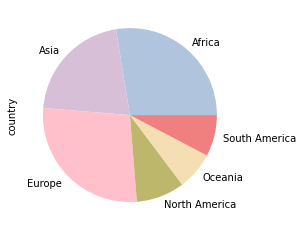

In [22]:
colors = ['lightsteelblue', 'thistle', 'pink', 'darkkhaki', 'wheat','lightcoral']
groupedcontinent.plot.pie(colors=colors)

Since we narrowed down that Europe has the largest alcohol consumption, I am interested in finding out which countries within Europe have the highest number of beer, spirit, and wine servings respectively.

- ```df['col'].max()```: This shows us the max value
- ```df['col']=`df['col'].max()```: This shows us true / false boolean values 
-```df[df['col']=`df['col'].max()]```: This returns the rows with the max column value
-```pd.concat([df1,df2,df3])```: This concatenates the dataframes vertically. Concat, merge and join function similarly. The difference is that ***concat*** combines dataframes ***vertically***, whereas ***merge and join*** combines dataframes ***horizontally***. 


In [58]:
europedata=newalcoholdata[newalcoholdata['Continent']=='Europe']
europedata.head()

,Continent,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
1,Europe,Albania,89,132,54,4.9
3,Europe,Andorra,245,138,312,12.4
5,Europe,Azerbaijan,21,46,5,1.3
9,Europe,Austria,279,75,191,9.7
13,Europe,Armenia,21,179,11,3.8


In [54]:
europedata[europedata['beer_servings']==europedata['beer_servings'].max()]

,Continent,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
56,Europe,Germany,346,117,175,11.3


In [55]:
europedata['beer_servings'].max()

346

In [61]:
(europedata['beer_servings']==europedata['beer_servings'].max()).head()

1     False
3     False
5     False
9     False
13    False
Name: beer_servings, dtype: bool

In [74]:
europebeer=europedata[europedata['beer_servings']==europedata['beer_servings'].max()]
europebeer

,Continent,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
56,Europe,Germany,346,117,175,11.3


In [77]:
europewine=europedata[europedata['wine_servings']==europedata['wine_servings'].max()]
europewine

,Continent,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
50,Europe,France,127,151,370,11.8


In [76]:
europespirit=europedata[europedata['spirit_servings']==europedata['spirit_servings'].max()]
europespirit

,Continent,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
26,Europe,Belarus,142,373,42,14.4


In [71]:
europebeer.merge(europewine,on='Continent').merge(europespirit,on='Continent')

,Continent,country_x,beer_servings_x,spirit_servings_x,wine_servings_x,total_litres_of_pure_alcohol_x,country_y,beer_servings_y,spirit_servings_y,wine_servings_y,total_litres_of_pure_alcohol_y,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Europe,Germany,346,117,175,11.3,France,127,151,370,11.8,Belarus,142,373,42,14.4


In [79]:
europemaxes=pd.concat([europebeer,europewine,europespirit])
europemaxes.reset_index()

,index,Continent,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,56,Europe,Germany,346,117,175,11.3
1,50,Europe,France,127,151,370,11.8
2,26,Europe,Belarus,142,373,42,14.4


On the flip side, I want to see which countries do not consume any alcohol. 
- ```(df['col1']=='x')&(df['col2']=='x')```: This shows us a boolean value. If we put wrap this function with a **df[]** on the outside, it will return a dataframe.

If you want to filter one columnn for multiple criterias, this is a good [resource](https://www.ritchieng.com/pandas-multi-criteria-filtering/).

In [96]:
(newalcoholdata['wine_servings']==0)&(newalcoholdata['beer_servings']==0)

0       True
1      False
2      False
3      False
4      False
       ...  
159    False
160    False
161    False
162    False
163    False
Length: 156, dtype: bool

In [97]:
#filtering multiple columns by same criteria
noalcohol=newalcoholdata[((newalcoholdata['wine_servings']==0)&(newalcoholdata['beer_servings']==0)&(newalcoholdata['spirit_servings']==0))]
noalcohol

,Continent,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Asia,Afghanistan,0,0,0,0.0
12,Asia,Bangladesh,0,0,0,0.0
70,Asia,Iran,0,0,0,0.0
81,Asia,Kuwait,0,0,0,0.0
91,Asia,Maldives,0,0,0,0.0
94,Africa,Mauritania,0,0,0,0.0
97,Europe,Monaco,0,0,0,0.0
117,Asia,Pakistan,0,0,0,0.0
136,Africa,Somalia,0,0,0,0.0


In [98]:
noalcohol.count()

Continent                       9
country                         9
beer_servings                   9
spirit_servings                 9
wine_servings                   9
total_litres_of_pure_alcohol    9
dtype: int64

### Conclusion: 
Europe has the largest consumption of alcohol across the world. Germany, France and Belarus takes the crown for beers, wine, and spirits respectively. 

As for countries that do not consume alcohol, there are 9 countries in our list which of which most of them are in Asia. Based on this [article](https://worldpopulationreview.com/country-rankings/countries-where-alcohol-is-illegal) I found, I believe it is because these countires have a sizable muslim population, therefore consumption of alchol is prohibited. 